In [1]:
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Read Data

df = pd.read_csv("..\data\out.moreno_kangaroo_kangaroo", sep = ' ', header = None, escapechar='%',skiprows = 1, names = ['n','nbr','weight'])
#df = pd.read_csv("..\data\out.moreno_lesmis_lesmis", sep = ' ', header = None, escapechar='%',skiprows = 1, names = ['n','nbr','weight'])
df = pd.DataFrame(df)
df = df.drop(0, axis=0)
df
# values of n start from row 1
# row 0: 91 states the total number of combinaiton; 17 stats the number of nodes

,n,nbr,weight
1,1,2,21
2,1,3,10
3,1,4,45
4,1,5,54
5,1,6,7
...,...,...,...
87,11,13,2
88,11,15,5
89,13,14,1
90,13,15,3


In [3]:
# df.values
# pd.DataFrame(df).index
# df.values[df['weight']>10,:]
# df
# df.index = ['prior']+ list(range(1,92))
# df = pd.DataFrame(df)
# set(df.loc[df['weight']>10,'n'].values)
# 

In [4]:
G = nx.Graph()
G.add_weighted_edges_from(df.values)
G_edge = list(G.edges.data())

In [37]:
# def f(x =3):
#     return x+4
# f(x= 5)
# G_edge[1][2]['weight']
# G_edge

In [6]:

G[17]

AtlasView({9: {'weight': 1}})

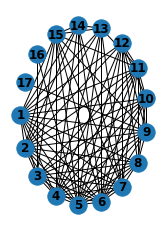

In [7]:
plt.subplot(121)
nx.draw_shell(G, with_labels = True, font_weight = 'bold')
plt.show()

$$F((i,j)) = w_{ij}\{\frac{w_i+w_j}{w_{ij}}- \sum_{e(i)\sim (i,j)}\frac{d(i)}{w_{ij}w_{e(i)}} \}-\sum_{e(j)\sim (i,j)}\frac{d(j)}{w_{ij}w_{e(j)}} \}$$

In [93]:


def fun_incident_sum_11(G):
#For Forman curvature for G wieh edge i,j incident_sum_11
#n_i :node i
#nbr_j = n_j : node j
#nbr_k: the neighbor of node i
#eattr_j,eattr_k, the weight with corresponding edges that connects i,j(k)
# i,j controls ith row and jth columns respectively
    #G is the matrix
    totNodes = len(list(G.nodes()))
    incident_sum_11 = np.zeros((totNodes,totNodes))
    for n_i, nbrs_i in G.adj.items():
        for nbr_j,eattr_j in nbrs_i.items():
            wt_j = eattr_j['weight']
            for nbr_k, eattr_k in nbrs_i.items():
                wt_k = eattr_k['weight']
                if nbr_k != nbr_j:
                    # incident_sum_11[n_i-1,nbr_j-1] = G.degree(n_i)/(wt_j*wt_k)
                    if  wt_j*wt_k != 0:
                        incident_sum_11[n_i-1,nbr_j-1] += G.degree(n_i)/np.sqrt((wt_j*wt_k))
                    # print('n_i:', n_i, "; nbrs_j ", nbr_j,'; Degree:', G.degree(n_i),'; wt_j ',wt_j,'; wt_k',wt_k )
    return(incident_sum_11)
                

def fun_incident_sum_12(G):
#For Forman curvature for G wieh edge i,j incident_sum12
#n_i :node j
#nbr_j = n_j : node i
#nbr_k: the neighbor of node i
#eattr_j,eattr_k, the weight with corresponding edges that connects i,j(k)
# i,j controls ith row and jth columns respectively
    #G is the matrix
    totNodes = len(list(G.nodes()))
    incident_sum_12 = np.zeros((totNodes,totNodes))
    for n_i, nbrs_i in G.adj.items():
        for nbr_j,eattr_j in nbrs_i.items():
            wt_j = eattr_j['weight']
            for nbr_k, eattr_k in nbrs_i.items():
                wt_k = eattr_k['weight']
                if nbr_k != nbr_j:
                    # incident_sum_11[n_i-1,nbr_j-1] = G.degree(n_i)/(wt_j*wt_k)
                    if  wt_j*wt_k != 0:
                        incident_sum_12[nbr_j-1,n_i-1] += G.degree(n_i)/np.sqrt((wt_j*wt_k))
                    # print('n_i:', n_i, "; nbrs_j ", nbr_j,'; Degree:', G.degree(n_i),'; wt_j ',wt_j,'; wt_k',wt_k )
    return(incident_sum_12)            


def fun_Weight_matrix(G):
    totNodes = len(list(G.nodes()))
    wt_mtx = np.zeros((totNodes,totNodes))
    for n_i, nbrs_i in G.adj.items():
        for nbr_j, eattr_j in nbrs_i.items():
            wt_j = eattr_j['weight']
            wt_mtx[n_i-1,nbr_j-1] = np.float32(wt_j)
    return(wt_mtx)

def fun_first_part_matrix_1(G):
    totNodes = len(list(G.nodes()))
    wt_mtx = np.zeros((totNodes,totNodes)) 
    for n_i, nbrs in G.adj.items():
        for nbr_j, ettar_j in nbrs.items():
            wt_j = ettar_j['weight']
            wt_mtx[n_i-1,nbr_j-1] = (G.degree(n_i) + G.degree(nbr_j))/wt_j
    return(wt_mtx)


    
def fun_Forman_edge_curvature_matrix_1(G):
    inci_matrix_11 = fun_incident_sum_11(G)
    inci_matrix_12 = fun_incident_sum_12(G)
    Weight_mtx = fun_Weight_matrix(G)
    first_pmtx_1 = fun_first_part_matrix_1(G)
    FC_Edge_Val = Weight_mtx * (first_pmtx_1 - inci_matrix_11-inci_matrix_12)
    return(FC_Edge_Val)


def fun_Forman_node_curvature_matrix_1(FC_edg_mtx):
    rows, columns = FC_edg_mtx.shape
    tmp_matrix = np.zeros([rows,columns],dtype=float)
    for n_i, nbrs in G.adj.items():
        for nbr_j, _ in nbrs.items():
            for n_j, nbrsk in G.adj.items():
                if n_j == nbr_j:
                    # we only search for (n_j = nbr_k) n_j is equavelent to nbr_j
                    for nbr_k, _ in nbrsk.items():
                        tmp_matrix[n_i-1,nbr_j-1] += FC_edg_mtx[n_j-1,nbr_k-1]
    return tmp_matrix
    






In [38]:
FC_edg_mtx_1 = fun_Forman_edge_curvature_matrix_1(G)
# FC_edg_mtx_1 

In [32]:
# inci_matrix_11 = fun_incident_sum_11(G)
# inci_matrix_12 = fun_incident_sum_12(G)
# Weight_mtx = fun_Weight_matrix(G)
# first_pmtx_1 = fun_first_part_matrix_1(G)
# FC_Edge_Val = Weight_mtx * (first_pmtx_1 - inci_matrix_11-inci_matrix_12)
# FC_Edge_Val2 =np.multiply(Weight_mtx ,(first_pmtx_1 - inci_matrix_11-inci_matrix_12))
# FC_Edge_Val3 =np.dot(Weight_mtx ,(first_pmtx_1 - inci_matrix_11-inci_matrix_12))


In [99]:
fun_rfc_comms(FC_edg_mtx_1, alpha= np.ones(totNodes), G=G)

array([[0.00000000e+00, 6.65880322e-02, 2.83065424e-02, 8.49612501e-02,
        2.59882093e-02, 6.37165062e-02, 1.31014992e-01, 2.22261985e-01,
        5.19604924e-03, 2.46869996e-01, 6.80462910e-02, 3.84356419e-01,
        4.15256268e-01, 9.28843433e-01, 1.39404221e-01, 0.00000000e+00,
        0.00000000e+00],
       [5.48214663e-02, 0.00000000e+00, 2.72705357e-02, 5.47646020e-02,
        1.56572381e-02, 3.99019408e-02, 9.74457561e-02, 2.26556486e-01,
        1.05113730e-02, 2.52955267e-01, 8.92667074e-02, 3.06846849e-01,
        4.26263583e-01, 7.40566770e-01, 2.14536245e-01, 0.00000000e+00,
        0.00000000e+00],
       [3.18194518e-02, 3.72344609e-02, 0.00000000e+00, 2.98315339e-02,
        9.56804435e-03, 3.53681335e-02, 5.96189766e-02, 2.00766650e-01,
        8.68300990e-03, 2.12469297e-01, 7.35460177e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.21141313e-01, 1.12503649e+02,
        0.00000000e+00],
       [8.40058232e-02, 6.57709276e-02, 2.62396607e-02, 0.000

In [33]:

# np.all(FC_Edge_Val == FC_Edge_Val3)


False

In [9]:

# totNodes = len(list(G.nodes()))
# incident_sum_11 = np.zeros((totNodes,totNodes))
# # incident_sum1 = np.zeros((totNodes,totNodes))
# incident_sum1[0,0] = 1
# aa = 0
# for i in range(10):
#     for j in range(10):
#         incident_sum1[i,j] = i+j
# incident_sum1

In [42]:
#Necessary Functions:

def scale(X):
    #scale along the columns, i.e. turn into stochastic matrix with sum of row into 1
    tt = X.sum(axis = 1)
    X = X/tt
    return X

In [45]:
# X = np.matrix([[1,2,3],[4,5,6]])
# scale(X)
# scale(X).sum(axis = 1)

matrix([[1.],
        [1.]])

In [83]:
# rows, columns = FC_edg_mtx.shape
# for j in range(columns):
#     FC_edg_mtx[:,j] = FC_edg_mtx[:,j]/G.degree(j+1)
# alpha_j = 1
# FC_edg_mtx = alpha_j *np.abs(FC_edg_mtx)

# j = 1
# FC_edg_mtx[:,1]
# alpha[1]

# alpha = np.ones([totNodes])
# pd.DataFrame(fun_rfc_cc_dd(FC_edg_mtx,alpha)).head()

1.0

In [85]:
# def increment(number):
#    # inner function should appear before the reference 
#     def inner_increment():
#         return number + 1
#     a = inner_increment()
#     return a


# increment(10)

11

In [95]:
# Now take Define function H
# Note Alpha_j should be a array vector 1 cross n 

def fun_rfc(FC_edg_mtx):
    # relative_forman_curvature
    FC_edg_mtx = np.abs(FC_edg_mtx)
    return scale(FC_edg_mtx)

def fun_rfc_dd(FC_edg_mtx):
    # relative_forman_curvature_Degree_Divided
    FC_edg_mtx = np.abs(FC_edg_mtx)
    rows, columns = FC_edg_mtx.shape
    for j in range(columns):
        FC_edg_mtx[:,j] = FC_edg_mtx[:,j]/G.degree(j+1)
    return scale(FC_edg_mtx)

def fun_rfc_cc(FC_edg_mtx,alpha):
    # relative_fc_with_cc
    FC_edg_mtx = np.abs(FC_edg_mtx)
    rows, columns = FC_edg_mtx.shape
    for j in range(columns):
        FC_edg_mtx[:,j] = FC_edg_mtx[:,j]* alpha[j]
    return scale(FC_edg_mtx)


def fun_rfc_cc_dd(FC_edg_mtx,alpha):
    # relative_fc_with_cc_Degree_Divided
    FC_edg_mtx = np.abs(FC_edg_mtx)
    rows, columns = FC_edg_mtx.shape
    for j in range(columns):
        FC_edg_mtx[:,j] = (FC_edg_mtx[:,j]*alpha[j])/G.degree(j+1)
    return scale(FC_edg_mtx)

def fun_rfc_comms(FC_edg_mtx, alpha,G):
    # relative_forman_curvature
    FC_edg_mtx = np.abs(FC_edg_mtx)
    first_part = fun_rfc_cc_dd(FC_edg_mtx,alpha)
    
    def fun_last_part(FC_edg_mtx,G):
        #Construct matrix \sum_{e(j)~(i,j)}|F(j,k)|
        #FC_edg_mtx = np.abs(FC_edg_mtx) #Since it already Exists in the outer function
        rows, columns = FC_edg_mtx.shape
        tmp_matrix = np.zeros([rows,columns],dtype=float)
        for n_i, nbrs in G.adj.items():
            for nbr_j, _ in nbrs.items():
                for n_j, nbrsk in G.adj.items():
                    if n_j == nbr_j:
                        # we only search for (n_j = nbr_k) n_j is equavelent to nbr_j
                        for nbr_k, _ in nbrsk.items():
                            if nbr_k != n_i:
                                #exclude edge (i,j)
                                tmp_matrix[n_i-1,nbr_j-1] += FC_edg_mtx[n_j-1,nbr_k-1]
        for j in range(columns):
            tmp_matrix = FC_edg_mtx[:,j]* (1-alpha[j])
        return tmp_matrix

    last_part = fun_last_part(FC_edg_mtx,G)
    Final_matrix = first_part + last_part

    return scale(Final_matrix)



